## Ayudantía 1

### Profesor: Luis Cossio
### Ayudante: Gabriel Díaz

## ¿Qué es un Dataset?

Un **dataset** (conjunto de datos) es una **colección organizada de información** que puede presentarse en forma de tablas, listas, imágenes o cualquier otro formato digital. Es la materia prima para el análisis de datos, Machine Learning y Minería de Datos.

### Características de un Dataset:
- **Filas**: Cada fila representa una **observación** o **registro** (ej., un cliente, un producto, etc.).  
- **Columnas**: Cada columna es una **variable** o **atributo** (ej., nombre, precio, edad).  
- Puede estar en diferentes **formatos**: CSV, Excel, JSON, SQL, etc.

### Ejemplo de un Dataset (Información de Teléfonos):

| brand    | model       | price  | battery_capacity | ram  |
|----------|-------------|--------|-------------------|------|
| Samsung  | Galaxy S23  | 800    | 5000 mAh         | 8GB  |
| Apple    | iPhone 14   | 900    | 4323 mAh         | 6GB  |
| Xiaomi   | Redmi Note  | 350    | 5000 mAh         | 6GB  |

---

## ¿Qué es un DataFrame?

Un **DataFrame** es una **estructura de datos tabular** (en forma de tabla) en Python. Es el formato más común para **manipular datasets** en ciencia de datos.

### Características de un DataFrame:
- Similar a una hoja de cálculo de Excel o una tabla SQL.  
- Puede manejar distintos tipos de datos (números, texto, fechas).  
- Facilita operaciones como **filtrar, agrupar, visualizar y transformar datos**.

### Cómo crear un DataFrame en Python:


In [12]:
import pandas as pd

# Crear un DataFrame a partir de un diccionario
data = {
    'brand': ['Samsung', 'Apple', 'Xiaomi'],
    'model': ['Galaxy S23', 'iPhone 14', 'Redmi Note'],
    'price': [800, 900, 350]
}

df_test = pd.DataFrame(data)
print(df_test)

     brand       model  price
0  Samsung  Galaxy S23    800
1    Apple   iPhone 14    900
2   Xiaomi  Redmi Note    350


In [1]:
# Importacion de librerias a utilizar y preparacion del espacio de trabajo
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
# Cargar el dataset "tips" de Seaborn, Dataset implementado en Python 
df = sns.load_dataset("tips")

# Mostrar las primeras filas del dataset
print(df.head())


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [3]:
df
#Para ver información de la dimensión del Dataset 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
dias_unicos = df["day"].unique()
print("Días de la semana en el dataset:", dias_unicos)

# Contar días
conteo_dias = df["day"].value_counts()
print("\nCantidad de registros por día:\n", conteo_dias)


Días de la semana en el dataset: ['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

Cantidad de registros por día:
 day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64


C:\Users\aleja\AppData\Local\Temp\ipykernel_18948\1558368781.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='size', y='total_bill', data=df, marker='o', ci=None)


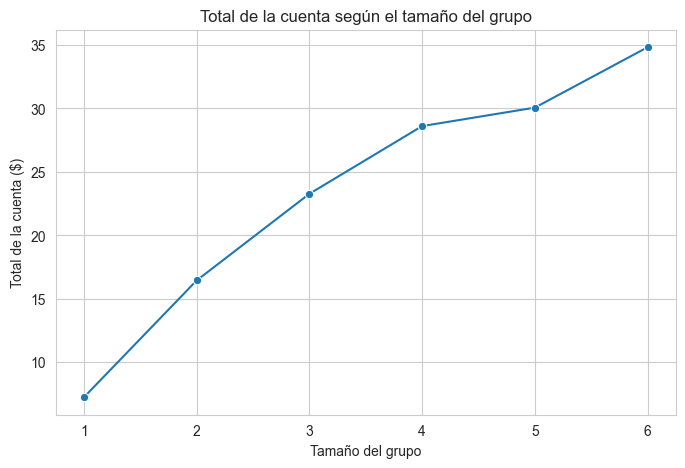

In [5]:
# Gráfico de líneas
plt.figure(figsize=(8, 5))
sns.lineplot(x='size', y='total_bill', data=df, marker='o', ci=None)
plt.title('Total de la cuenta según el tamaño del grupo')
plt.xlabel('Tamaño del grupo')
plt.ylabel('Total de la cuenta ($)')
plt.show()

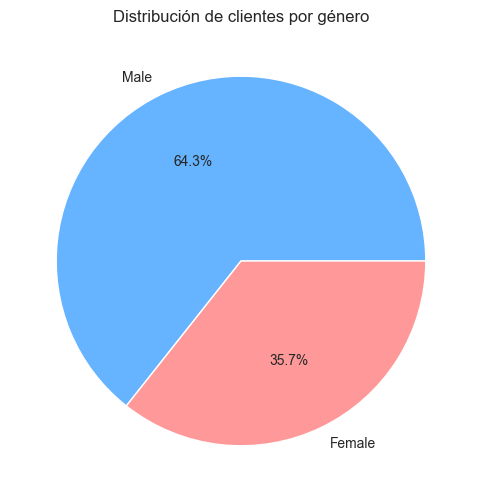

In [6]:
# Contar cuántos clientes hay por género
gender_counts = df['sex'].value_counts()

# Gráfico de torta
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
plt.title('Distribución de clientes por género')
plt.show()


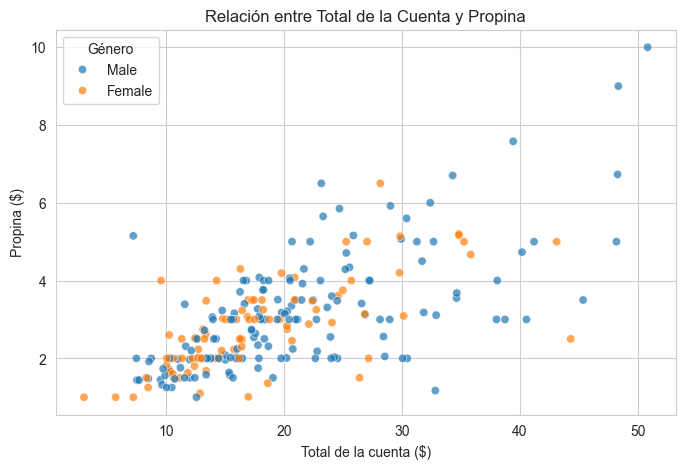

In [7]:
# Gráfico de dispersión (scatter plot)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=df, alpha=0.7)
plt.title('Relación entre Total de la Cuenta y Propina')
plt.xlabel('Total de la cuenta ($)')
plt.ylabel('Propina ($)')
plt.legend(title='Género')
plt.show()


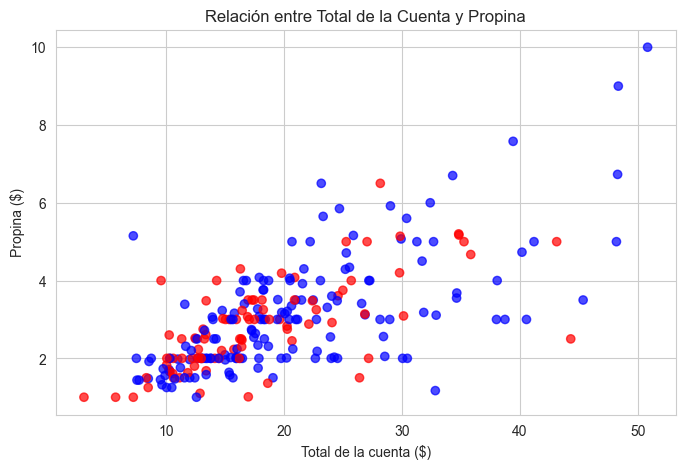

In [8]:
# Gráfico de dispersión con Matplotlib
plt.figure(figsize=(8, 5))

# Color según el género
colors = {'Male': 'blue', 'Female': 'red'}
plt.scatter(df['total_bill'], df['tip'], c=df['sex'].map(colors), alpha=0.7, label='Datos')

#Etiquetas y título
plt.title('Relación entre Total de la Cuenta y Propina')
plt.xlabel('Total de la cuenta ($)')
plt.ylabel('Propina ($)')

plt.grid(True)
plt.show()


C:\Users\aleja\AppData\Local\Temp\ipykernel_18948\1978671646.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='tip', data=df, estimator='mean', palette='viridis')


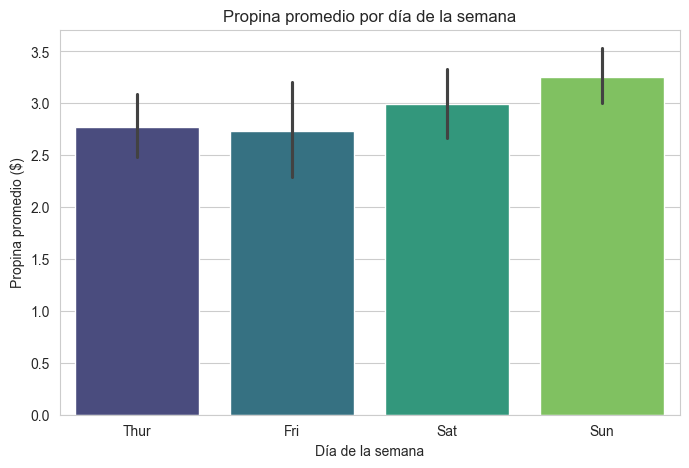

In [9]:
# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x='day', y='tip', data=df, estimator='mean', palette='viridis')
plt.title('Propina promedio por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Propina promedio ($)')
plt.show()


In [13]:
# Cargar el dataset "penguins"
df_alum = sns.load_dataset("penguins")
df_alum

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


C:\Users\aleja\AppData\Local\Temp\ipykernel_18948\2944038175.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=df_alum, palette='muted')


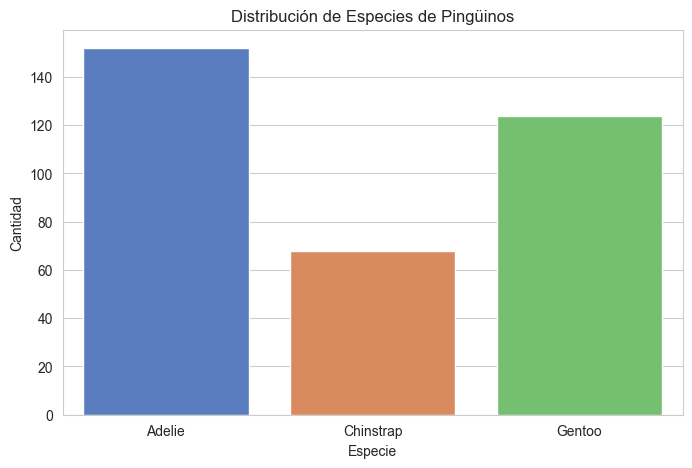

In [14]:
# Visualizar la distribución de especies de pingüinos
plt.figure(figsize=(8, 5))
sns.countplot(x='species', data=df_alum, palette='muted')
plt.title('Distribución de Especies de Pingüinos')
plt.xlabel('Especie')
plt.ylabel('Cantidad')
plt.show()

## Tarea para los alumnos Dataset Penguins

### Explorar el dataset:

1. Mostrar las primeras 10 filas.

### Análisis de una característica:

2. Calcular el promedio de la masa corporal (body_mass_g) para cada especie.

### Visualización de relaciones:

3. Crear un gráfico de dispersión entre bill_length_mm y bill_depth_mm, diferenciando por especie.

### Identificar la especie más pesada:

4. ¿Cuál es la especie de pingüino con la mayor masa corporal promedio?

In [15]:
df_alum.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [17]:
# 2
promedio_masa= df_alum.groupby("species")["body_mass_g"].mean()
promedio_masa

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

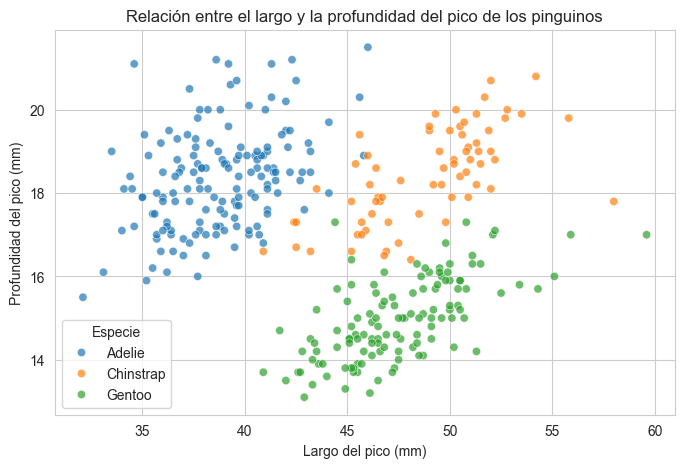

In [20]:
#3 
plt.figure(figsize=(8,5))
sns.scatterplot(x="bill_length_mm", y="bill_depth_mm", hue="species",data=df_alum,alpha=0.7)
plt.title("Relación entre el largo y la profundidad del pico de los pinguinos")
plt.xlabel("Largo del pico (mm)")

plt.ylabel("Profundidad del pico (mm)")
plt.legend(title="Especie")
plt.show()

In [ ]:
# 4 
plt.figure(figsize=())